In [39]:
# custom data transform for removing columns with few unique values
from numpy import unique, mean, std, where, logical_or
from pandas import read_csv
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
df = pd.read_excel ('CREDIT.xls')
print(df.shape)
df.head()

(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
df.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [42]:
# Show all names of features 
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:		


X1 = Amount of the given credit (NT dollar).	
X2 = Gender (1 = male; 2 = female).	
X3 = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).	
X4 = Marital status (1 = married; 2 = single; 3 = others).	
X5 = Age(year)	
X6 = History of past payment the repayment status in September, 2005; 	
X7 = the repayment status in Agustus  2005	
X8 = the repayment status in July, 2005	
X9 = the repayment status in June, 2005	
X10 = the repayment status in Mei, 2005	
X11 = the repayment status in April, 2005. 	
X12 = amount of bill statement in September, 2005.	Amount of bill statement (NT dollar).	 
X13 = amount of bill statement in August, 2005.	
X14 = amount of bill statement in July, 2005.	
X15	amount of bill statement in June, 2005.	
X16	amount of bill statement in Mei, 2005.	
X17	amount of bill statement in April, 2005.	
X18	amount paid in September, 2005.	X18-X23:Amount of previous payment (NT dollar).	
X19	amount paid in August, 2005.	
X20	amount paid in July, 2005.	
X21	amount paid in June, 2005.	
X22	amount paid in Mei, 2005.	
X23	amount paid in April, 2005.	
<b>Y default payment next month	Target Variable,  default payment (Yes = 1, No = 0) </b>	

In [43]:
df.select_dtypes(include='int64').describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###### We consider summary statistics result towards numeric features such as X1-X23 (int64). The details of the atributes/features are discribed above

We can interpret feature X1 (Amount of the given credit (dollar)) has <b> mean / average 167484.322667  greater than standar deviation 129747.661567. It's mean that the data has lower volatility .<b>

A lower volatility means that the value does not fluctuate dramatically, but changes in value at a steady pace over a period of time.

## Spliting dataset into training and testing

In [44]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
X = df.drop('Y', axis=1).values
y = df['Y'].values

In [45]:
from sklearn.model_selection import train_test_split
 
#secara default train test data di bagi train 75% test 25%    
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3, #yg ini artinya kita buat test datanya 30%
                stratify=y)

# LINEAR REGRESSION

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('classic')
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.13
Accuracy of Logistic regression classifier on test set: 0.12


# LOGISTIC REGRESSION

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


Confusion matrix
[[7008    1]
 [1991    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on test set: 0.78


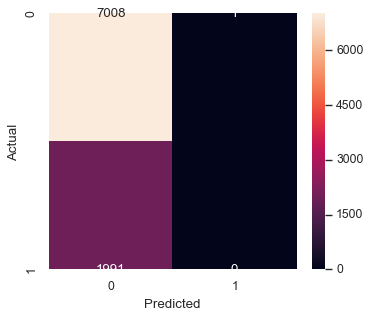

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
print('Confusion matrix')
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

logreg.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

# kNN ( K-Nearest Neighbors)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
# Fit the classifier to the data
knn.fit(X,y)

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [50]:
knn.score(X_test,y_test)

0.7997777777777778

Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on test set: 0.77
Confusion matrix
[[6743  266]
 [1810  181]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7009
           1       0.40      0.09      0.15      1991

    accuracy                           0.77      9000
   macro avg       0.60      0.53      0.51      9000
weighted avg       0.70      0.77      0.71      9000



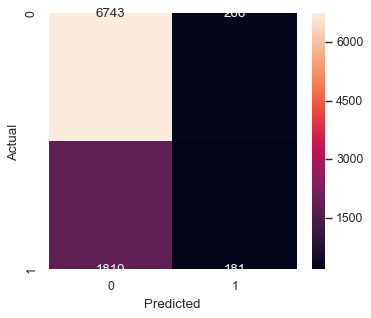

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7009
           1       0.40      0.09      0.15      1991

    accuracy                           0.77      9000
   macro avg       0.60      0.53      0.51      9000
weighted avg       0.70      0.77      0.71      9000



In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

# SVM ( Support Vector Machine)

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.78
Confusion matrix
[[7009    0]
 [1991    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



/Users/bqdesy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


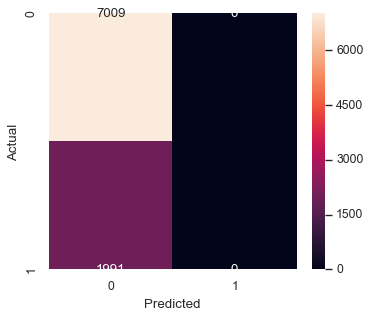

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



In [52]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

# Naive Bayes

Accuracy of GNB classifier on training set: 0.38
Accuracy of GNB classifier on test set: 0.39
Confusion matrix
[[1777 5232]
 [ 243 1748]]
              precision    recall  f1-score   support

           0       0.88      0.25      0.39      7009
           1       0.25      0.88      0.39      1991

    accuracy                           0.39      9000
   macro avg       0.57      0.57      0.39      9000
weighted avg       0.74      0.39      0.39      9000



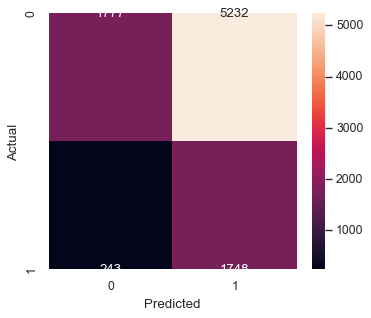

              precision    recall  f1-score   support

           0       0.88      0.25      0.39      7009
           1       0.25      0.88      0.39      1991

    accuracy                           0.39      9000
   macro avg       0.57      0.57      0.39      9000
weighted avg       0.74      0.39      0.39      9000



In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

# Linear Discriminant Analysis

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.81


[[6776  233]
 [1485  506]]


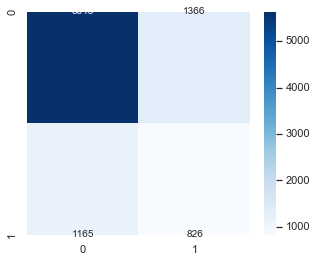

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.68      0.25      0.37      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000



In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = lda.predict(X_test)
plt.figure(figsize=(5, 4))
print(confusion_matrix(y_test, pred))
sns.heatmap(cf_mat, annot=True,fmt='g',cmap="Blues")
plt.show()
print(classification_report(y_test, pred))

# Decision Tree

Accuracy of Decision Tree classifier on training set: 0.38
Accuracy of Decision Tree classifier on test set: 0.39
Confusion matrix
[[5643 1366]
 [1165  826]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.41      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.72      9000



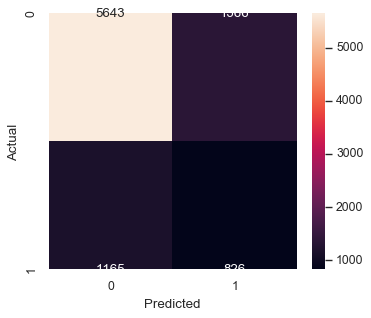

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.41      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.72      9000



In [54]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

In [55]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [56]:
conda install python-graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [57]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render('CREDIT1') 


'CREDIT1.pdf'

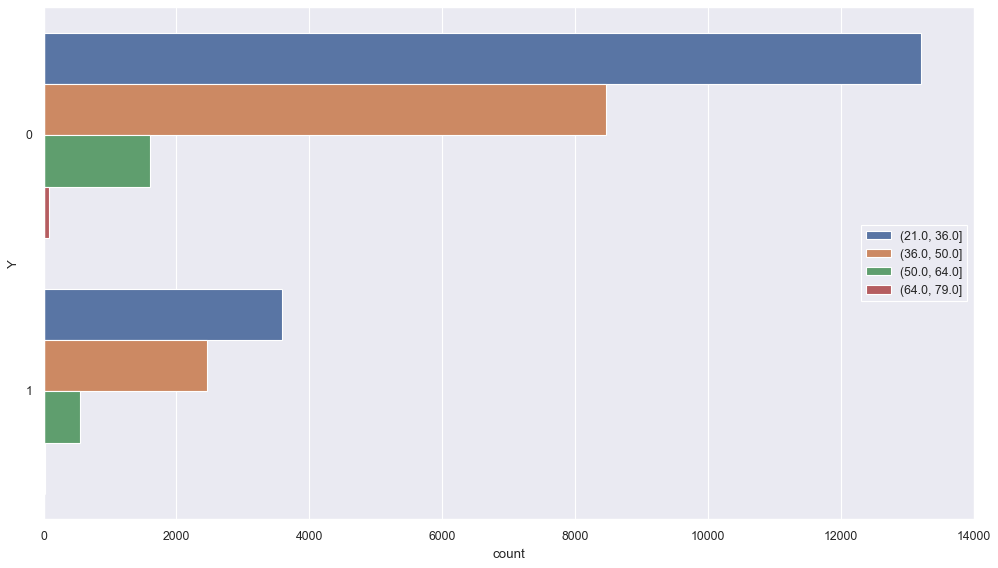

In [62]:
# Categorizing of Age into 4 categories

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('classic')
sns.set()
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

df['X5']= pd.cut(df['X5'], bins=4, precision=0) 
plt.figure(figsize=(15,8))
sns.countplot(y='Y', hue='X5', data = df)
plt.legend(loc = 'center right')


##### From the Graph above we can say that most of customers who are using credit card is in Age between 21 - 36 year old is dominant among other age categories.

Y  X3
0  2     10700
   1      8549
   3      3680
   5       262
   4       116
   6        43
   0        14
1  2      3330
   1      2036
   3      1237
   5        18
   6         8
   4         7
Name: X3, dtype: int64

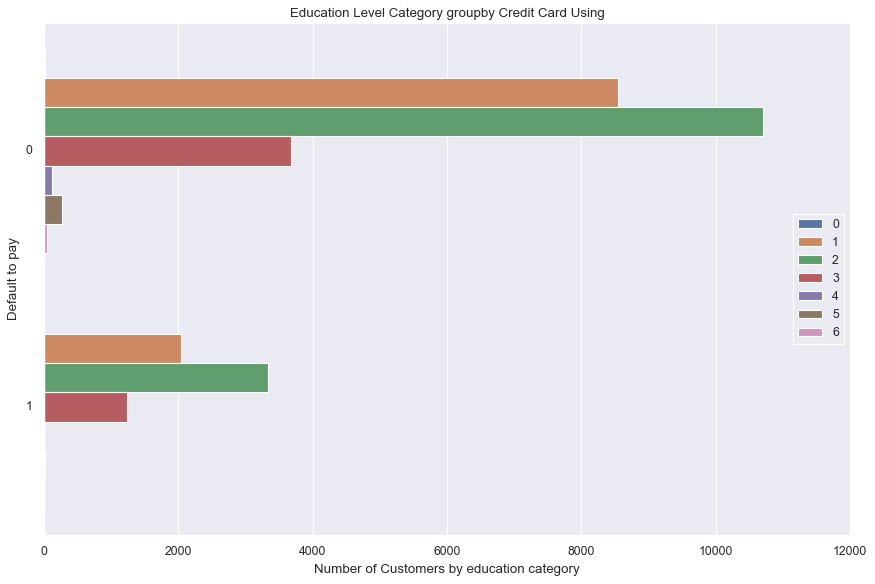

In [63]:
# Bar chart Education groupby Y (default to pay)
plt.figure(figsize=(13,8))
sns.countplot(y='Y', hue='X3', data = df)
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers by education category')
plt.ylabel('Default to pay')
plt.title('Education Level Category groupby Credit Card Using')

# Table Education group by Y
df.groupby('Y')['X3'].value_counts()


#### X3 = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Based on some the result of graphs above, we can say that most customers using credit card is in category 2 (University Student - green bar on the Bar Chart), following with (Graduate Student) as second rank on using credit card (Orange colour on Bar Chart).


Y  X4
0  2     12623
   1     10453
   3       239
   0        49
1  2      3341
   1      3206
   3        84
   0         5
Name: X4, dtype: int64

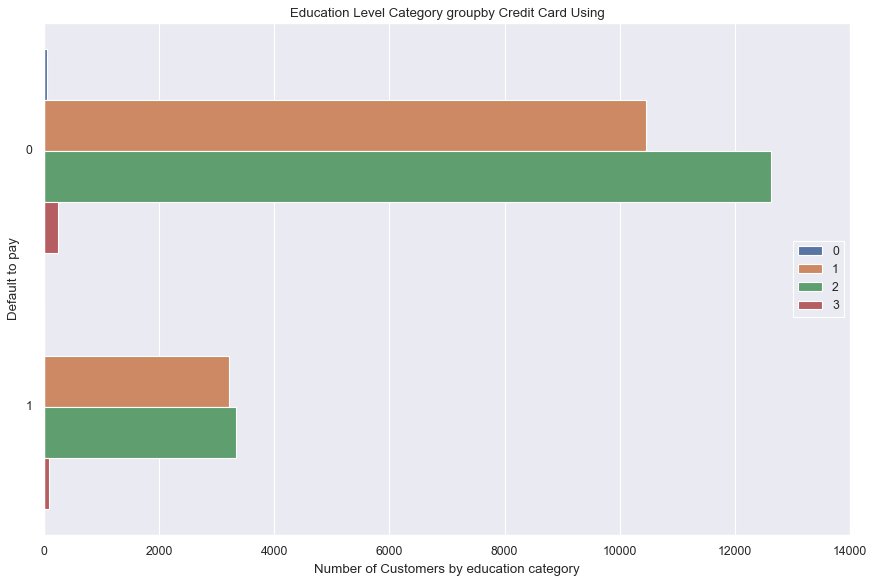

In [64]:
# Bar chart Credit group by Marriage Status 
plt.figure(figsize=(13,8))
sns.countplot(y='Y', hue='X4', data = df)
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers by education category')
plt.ylabel('Default to pay')
plt.title('Education Level Category groupby Credit Card Using')

# Table Credit group by Marriage Status 
df.groupby('Y')['X4'].value_counts()

###### X1 = Amount of the given credit (NT dollar).
###### X4 = Marital status (1 = married; 2 = single; 3 = others).
Based on some the result of graphs above, we can say that most customers using credit card is in category 2 (Single - green bar on the Bar Chart), following with category 1(Married) as second rank on using credit card (Orange colour on Bar Chart).

### Group data by NUMBER of credit GIVEN 

In [65]:
df_example = df.groupby(by = 'X1').agg({'X1': 'count'})

display (df_example)

,X1
X1,
10000,493
16000,2
20000,1976
30000,1610
40000,230
...,...
750000,4
760000,1
780000,2


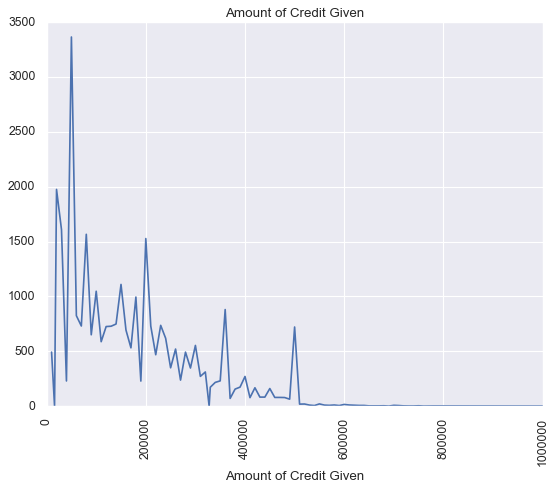

In [66]:
# Plot data
f, ax = plt.subplots(1,1)
ax.plot(df_example['X1'])

# Add title
ax.set_title('Amount of Credit Given')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 90)

# Show graph
plt.xlabel('Amount of Credit Given')
show = plt.show()
plt.close()

# Histogram

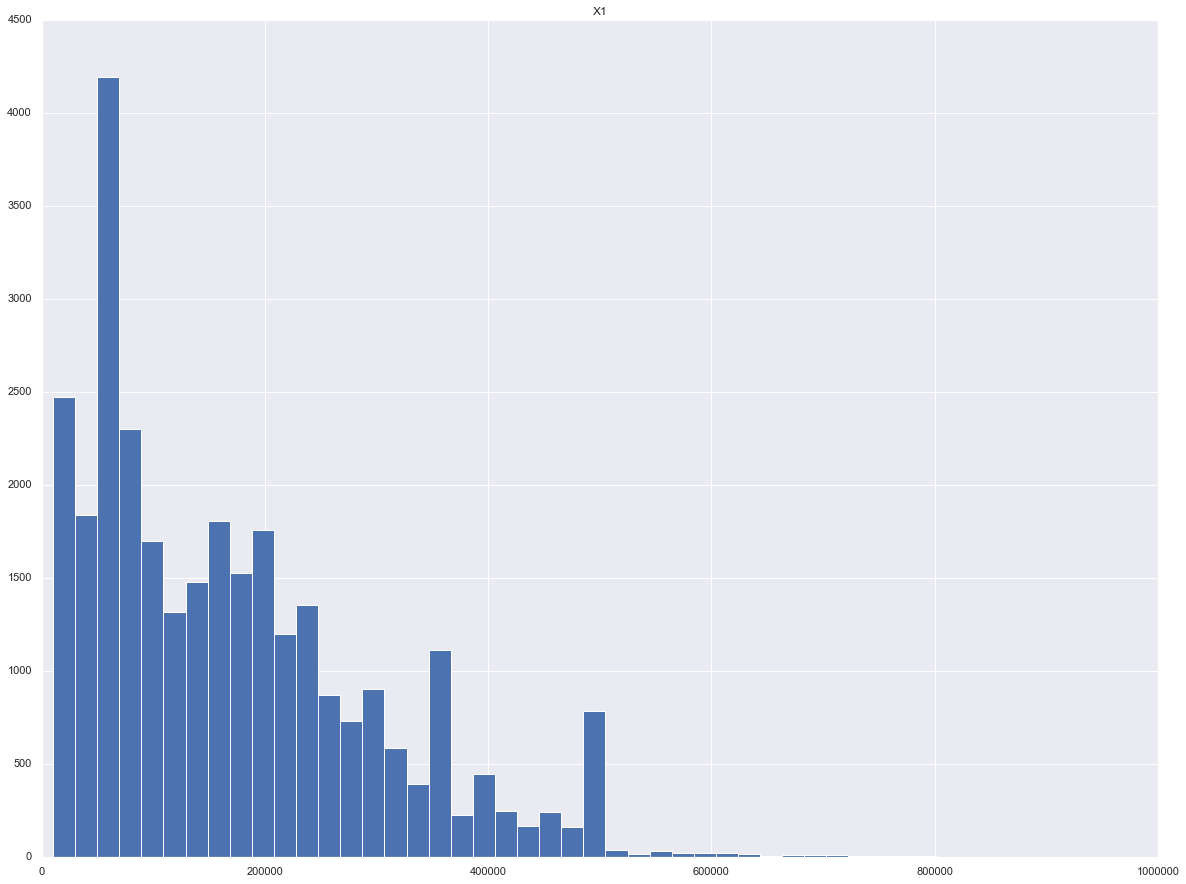

In [67]:
#X1 = Amount of the given credit (NT dollar).
%matplotlib inline
import matplotlib.pyplot as plt
df[['X1']].hist(bins=50, figsize=(20,15))
plt.show()

In [68]:
print(df.shape)
df.X2
# Group data by number of listings per year
df_example1 = df.groupby(by = 'X2').agg({'X2': 'count'})

display (df_example1)

(30000, 24)


,X2
X2,
1,11888
2,18112


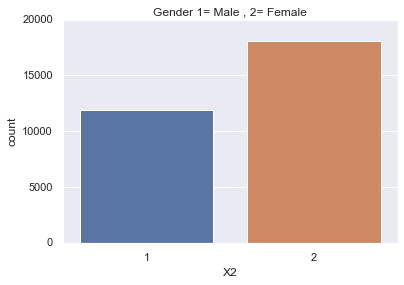

In [69]:
sns.countplot(df['X2'],label= "Gender")
plt.title('Gender 1= Male , 2= Female')
plt.show()

# Number of people who will pay for next month

Y
0    23364
1     6636
dtype: int64


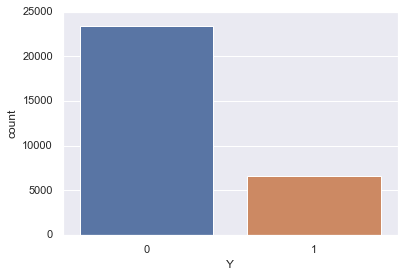

In [70]:
#Default to pay ( 0 = No , 1 = Yes)

from sklearn.model_selection import train_test_split
import seaborn as sns

print(df.groupby('Y').size())
sns.countplot(df['Y'],label="Count")
plt.show()

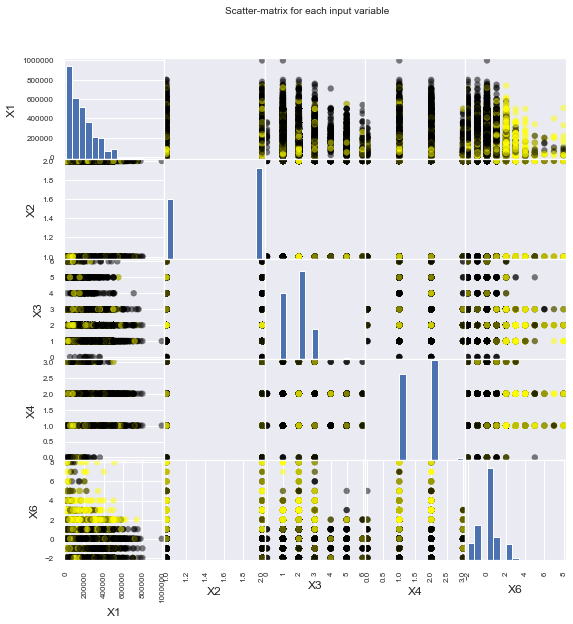

In [71]:
from pandas.plotting import scatter_matrix 
from matplotlib import cm

# Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split

feature_names = ['X1', 'X2', 'X3', 'X4','X6']
X = df[feature_names]
y = df['Y']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

### Calculate correlation

In [73]:
df['X1'].corr(df['X3'])

-0.21916069822921255

In [74]:
df['X1'].corr(df['X4'])

-0.10813941027801238

In [75]:
df['X1'].corr(df['Y'])

-0.15351987639350764

# AUC ( Area Under the Curve)

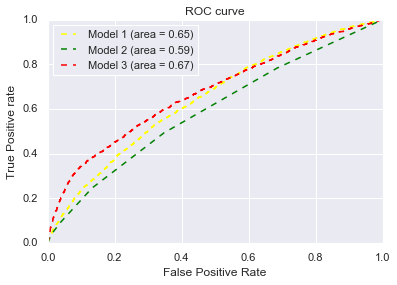

In [86]:
# predict probabilities
pred_prob1 = logreg.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = gnb.predict_proba(X_test)



# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)



# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])



# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='Model 1 (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Model 2 (area = %0.2f)' % auc_score2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Model 3 (area = %0.2f)' % auc_score3)



# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()